# California Housing Price Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline 

In [3]:
col_names = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms', 
            'population', 'households', 'medianIncome', 'medianHouseValue']
housing = pd.read_csv("cal_housing.data", names = col_names)
housing.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


No missing values.

In [5]:
housing.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


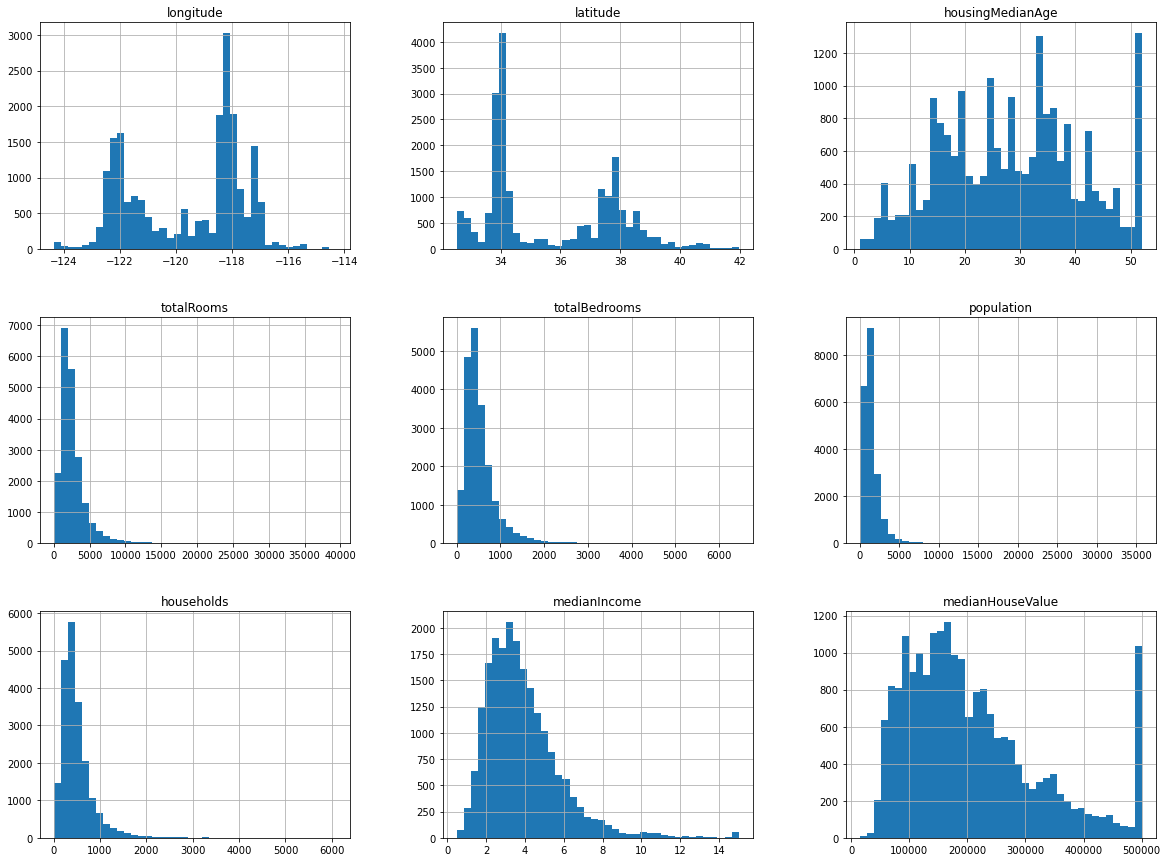

<Figure size 720x432 with 0 Axes>

In [6]:
housing.hist(bins=40, figsize=(20, 15))
_ = plt.figure(figsize=(10,6))
_ = plt.show()

No missing values

In [7]:
housing.isnull().sum()

longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
medianHouseValue    0
dtype: int64

<AxesSubplot:>

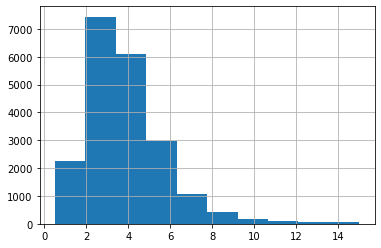

In [8]:
# Median income looks like an imp feature
housing['medianIncome'].hist()

In [9]:
# Split up the distrbution in 5 categories
housing['incomeCat'] = np.ceil(housing['medianIncome'] / 1.5)
# Putting everycthing about the 5th categaor as 5th categroy
housing['incomeCat'].where(housing['incomeCat'] < 5, other=5.0, inplace=True)
housing.head(3)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,incomeCat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3)

for train_index, test_index in split.split(housing, housing['incomeCat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [13]:
housing['incomeCat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: incomeCat, dtype: float64

In [14]:
strat_test_set['incomeCat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: incomeCat, dtype: float64

Above the proportions are maintained in the test set using straitified sampling.

Why straitified? Because the feature-space are less and also because its a mid-sized 
dataset and we don't want to miss out any a class

In [18]:
# Experimenting: with random sapling now
from sklearn.model_selection import train_test_split

train_set, test_set, = train_test_split(housing, test_size=0.2, random_state=30)

In [27]:
def income_cat_proportions(data):
    return data['incomeCat'].value_counts()/len(data)

comparing_props = pd.DataFrame({
    "Overall Proptions": income_cat_proportions(housing),
    "Random": income_cat_proportions(test_set),
    "Stratified": income_cat_proportions(strat_test_set)
}).sort_index()

comparing_props["random %error"] = 100 * comparing_props["Random"] / comparing_props["Overall Proptions"] - 100
comparing_props["strat %error"] = 100 * comparing_props["Stratified"] / comparing_props["Overall Proptions"] - 100
comparing_props

,Overall Proptions,Random,Stratified,random %error,strat %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.323159,0.318798,1.352378,-0.015195
3.0,0.350581,0.343992,0.350533,-1.879491,-0.013820
4.0,0.176308,0.177326,0.176357,0.577082,0.027480
5.0,0.114438,0.115310,0.114583,0.762066,0.127011


In [28]:
for items in (strat_train_set, strat_test_set):
    items.drop('incomeCat', axis=1, inplace=True)

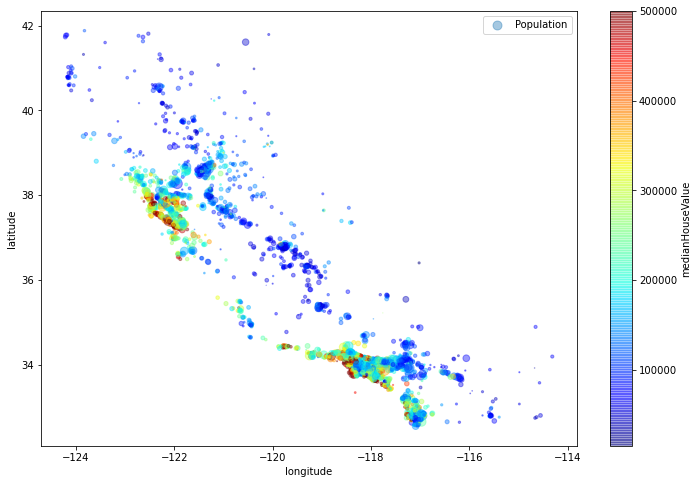

In [32]:
housing = strat_test_set.copy()

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label="Population", figsize=(12,8),
             c="medianHouseValue", cmap=plt.get_cmap('jet'), sharex=False)

plt.legend()